# Identifying A Low Risk Aircraft For A Strong Start In Aviation

This project aims to identify the lowest-risk aircraft for a new business venture into the aviation industry. It covers the following:
- Business Understanding
- Data Understanding 
- Data Preparation
- Data Visualization


# 1. Business Undestanding

## Objective

In this project, a comprehensive risk assessment has been conducted to identify low-risk aircraft options for commercial operations.

## Stakeholders

- The Executive: Responsible for the long-term benefits and financial risks associated with the Industry.
- The Head of Aviation: Responsible for operationalizing the expansion into the aviation industry and for the day-to-day logistics.
- The Finance Team: Responsible for ensuring financial sustainability.
- The Legal Team: They focus on the regulatory requirements and risk mitigation in the aviation sector.

## Key Considerations

- The type of aircraft to be used for commercial and private enterprises.
- How the company can leverage on past data to make informed decisions about aircraft acquisition.


# 2. Data Understanding

## Source of Data

The data used in this notebook is derived from **National Transportation Safety Board(NTSB) Aviation Accident Database** that includes aviation accident data from 1962-2023 about civil aviation accidents and selected incidents in the United States and international waters. The data can be accessed publicly from (https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses)

## Data Description

This dataset contains attributes such as:

* Accident number
* Weather condition
* Investigation type
* Purpose of flight
* Engine type
* Country
* Event date
* Total injuries
* Latitude, Longitude





## Load the Dataset

In [5]:
# Run the cell without changes
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\ADMIN\Downloads\extracted_files\AviationData.csv"
aviation_data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)
aviation_data.head()



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# 3. Data Preparation

It involves the following:

- Handling missing values
- Filter for relevant data
- Converting dates to datetime format
- Injury severity score




In [6]:
# Summary statistics
aviation_data.info()
aviation_data.describe()
aviation_data.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

(88889, 31)

In [7]:
# Check for missing values
aviation_data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [8]:
# Cleaning the dataset
aviation_data_cleaned = aviation_data.dropna(subset=['Weather.Condition'])
aviation_data_cleaned = aviation_data_cleaned.reset_index(drop=True)
print(aviation_data_cleaned)

             Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
84392  20221212106443           Accident      WPR23LA064  2022-12-09   
84393  20221212106444           Accident      ERA23LA085  2022-12-12   
84394  20221215106463           Accident      ERA23LA090  2022-12-14   
84395  20221219106470           Accident      ERA23LA091  2022-12-16   
84396  20221227106497           Accident      WPR23LA075  2022-12-26   

              Location        Country   Latitude   Longitude Airport.Code  \
0      MOOSE CREEK, ID  United States        NaN         N

In [9]:
# Convert dates to datetime format
aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'])

In [10]:
# Injury severity score
aviation_data['Injury severity'] = (
    aviation_data['Total.Fatal.Injuries'] * 3 +
    aviation_data['Total.Serious.Injuries'] * 2 +
    aviation_data['Total.Minor.Injuries'] * 1
)


In [11]:
# Filter for relevant data
aviation_data = aviation_data[aviation_data['Investigation.Type'] == 'Accident']

# 4. Data Visualization

## Key Business Questions

- Which aircraft has the lowest risk based on the accident history?
- What weather conditions correlate with higher risks?
- How the number of engines in an aircraft translates to the degree of injuries in case of an accident.

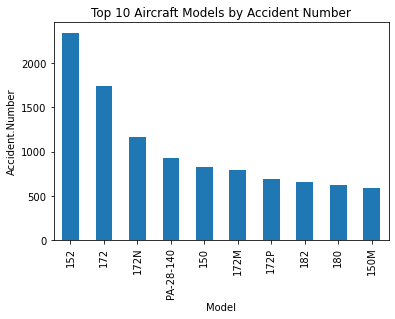

In [12]:
# Lowest risk aircraft
model_accidents = aviation_data['Model'].value_counts().head(10)
model_accidents.plot(kind='bar', title='Top 10 Aircraft Models by Accident Number', xlabel='Model', ylabel='Accident.Number')
plt.show()

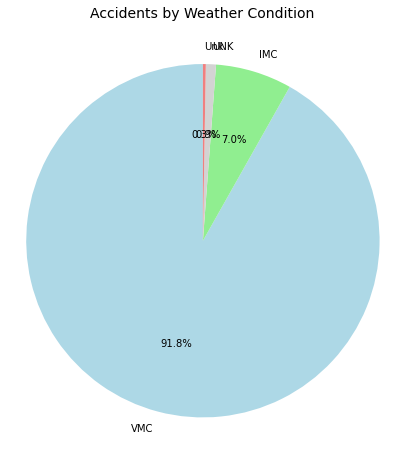

In [13]:
# Number of accidents by weather condition
weather_counts = aviation_data['Weather.Condition'].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 8))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightgray', 'lightcoral', 'lightskyblue'], textprops={'fontsize': 10})
plt.title('Accidents by Weather Condition', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()    



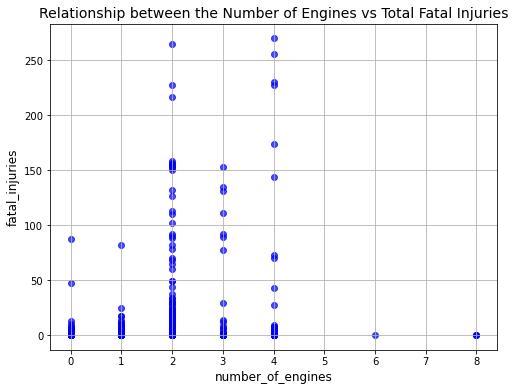

In [14]:
# Scatter plot
number_of_engines= aviation_data['Number.of.Engines']
fatal_injuries= aviation_data['Total.Fatal.Injuries']

plt.figure(figsize=(8, 6))
plt.scatter(number_of_engines, fatal_injuries, color='blue', alpha=0.7)
plt.title('Relationship between the Number of Engines vs Total Fatal Injuries', fontsize=14)
plt.xlabel('number_of_engines', fontsize=12)
plt.ylabel('fatal_injuries', fontsize=12)
plt.grid(True)
plt.show()

## 5. Conclusion

### Key Findings:
- Aircraft models with the lowest accident rates.
- Weather conditions associated with high risks.
- The impact the number of engines has on the total fatal injuries.

### Summary
- Aircraft models with fewer engines are associated with higher risks in adverse weather.
- Aircraft models with single engines should be avoided in places with harsh weather conditions.

### Recommendations:
- The company should focus on acquiring aircrafts with low acciddent numbers.
- More training should be offered with regards to adverse weather conditions.
- Aircraft models with single engines should be avoided in places with adverse weather conditions.